
# Chifuniro Evelyn Mattaka


## Description of the final model

The final model for the classifiction problem uses an ensemble learning method. This combines different predictors that were explored in this report. This allows for better predictions than with a single predictor that does pretty well. To measure the performance of a predictor, precision, recall, and f1 scores are used. The voting classifier has a precision of 14%, recall of 25% and f1 score of 17%. The voting classifier was used as the 3 different methods used do not classify the genre well as they make different errors. The classifier uses hard voting which predicts the class that gets the most votes.

### Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Test = pd.read_csv('CS98XClassificationTest.csv')
Train = pd.read_csv('CS98XClassificationTrain.csv')

### Viewing data

In [3]:
Test.head(2)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59


In [4]:
Train.head(2)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN


In [5]:
Test.shape

(113, 14)

In [6]:
Train.shape

(453, 15)

In [7]:
Train.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [ ]:
Train.dtypes

In [ ]:
Train.isnull().sum()

In [ ]:
Test.isnull().sum()

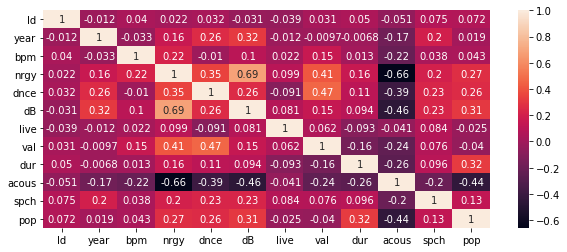

In [56]:
plt.figure(figsize =(10,4))
correlation = Train.corr()
sns.heatmap(correlation, annot=True)

# Preparing the data

To get the data tables ready for the analysis, there are some columns that will not work with the methods as they prefer integers. The Id, title, artist, and year are variables that will not add to the classification analysis as they would not impact the classfication of a song. 

There are also 15 missing values from the top genre column in the training dataset. Since the missing values are less than 20%, this will not affect the analysis too much so will be dropped to make for improved classification.

In [12]:
Train = Train.dropna(subset=["top genre"])

In [13]:
Train.head(2)

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards


In [14]:
spotify_cat = Train[["top genre"]] 
spotify_cat.head(2)

,top genre
0,adult standards
2,adult standards


In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
spotify_cat_encoded = ordinal_encoder.fit_transform(spotify_cat)
spotify_cat_encoded[:5]

array([[ 1.],
       [ 1.],
       [ 1.],
       [68.],
       [80.]])

In [16]:
from sklearn.preprocessing import OneHotEncoder
spotify_encoder = OneHotEncoder()
spotify_cat_1hot = spotify_encoder.fit_transform(spotify_cat)
spotify_cat_1hot

<438x86 sparse matrix of type '<class 'numpy.float64'>'
	with 438 stored elements in Compressed Sparse Row format>

In [ ]:
spotify_cat_1hot.toarray()

In [18]:
y= spotify_cat_encoded

In [19]:
X = Train.drop(['title','artist', 'Id', 'year', 'top genre', 'pop'], axis=1)

In [57]:
X.head(2)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
2,105,36,63,-9,13,67,245,11,3


## Scaling and splitting data

Machine learning techniques prefer to work on numerical attributes with similar scales. Standardisation is less affected by outliers in the data.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

# Select and training models

## Using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

In [27]:
pred = log_reg.predict(X_test)

In [ ]:
pred

### Evaluation of logistic regression

In [29]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred)

In [30]:
conf

array([[10,  0,  3, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  6, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0]])

We are able to produce a confusion matrix where each row represents an actual class and the column shows predicted class. The full confusion matrix can't be viewed so we will use a classification report to get a measure of how well the model performs.

In [31]:
from sklearn.metrics import classification_report

In [32]:
class_rep = classification_report(y_test, pred)
print("Logistic Regression: \n", class_rep)

Logistic Regression: 
               precision    recall  f1-score   support

         1.0       0.50      0.62      0.56        16
         3.0       0.00      0.00      0.00         0
         4.0       0.19      0.60      0.29        10
         6.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         2
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         2
        18.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         1
        24.0       0.00      0.00      0.00         3
        25.0       0.00      0.00      0.00         3
        31.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         0
        39.0       0.00      0.00      0.00         1
    

/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, different values are obtained about the models performace. The overall precision is 0.18, recall 0.27, and f1 score is 0.21. The f1 score is low because both recall and precision scores are also low.

Logistic regression will be used as a baseline to compare more complex methods for classification.

## Decision tree classifier

Decision tree classification will be used in this section to see if there is an improvement to the logistic regression model.

In [33]:
from sklearn.tree import DecisionTreeClassifier

With the remaing model methods, the target variable will not be changed to ensure no information is lost. The methods are also able to handle categorical variables.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,spotify_cat, test_size=0.2, random_state=42)

In [35]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

pred_tree = tree.predict(X_test)

In [ ]:
pred_tree

The model seems to be good at predicting songs that belong to rock and pop sections.

### Evaluation of decision tree

In [37]:
confusion_matrix(y_test, pred_tree)

array([[6, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
class_rep1 = classification_report(y_test, pred_tree)
print("Decision Tree: \n", class_rep1)

Decision Tree: 
                        precision    recall  f1-score   support

      adult standards       0.40      0.38      0.39        16
              afropop       0.00      0.00      0.00         0
           album rock       0.24      0.40      0.30        10
     alternative rock       0.00      0.00      0.00         1
american folk revival       0.00      0.00      0.00         0
              art pop       0.00      0.00      0.00         0
             art rock       0.00      0.00      0.00         3
          atl hip hop       0.00      0.00      0.00         2
     avant-garde jazz       0.00      0.00      0.00         1
        barbadian pop       0.00      0.00      0.00         1
                bebop       0.00      0.00      0.00         2
          belgian pop       0.00      0.00      0.00         1
                blues       0.00      0.00      0.00         1
             boogaloo       0.00      0.00      0.00         0
             boy band       0.12     

/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report tells us how well the decision tree method performs. With a precision of 14%, recall of 15% and f1 score of 14%. 

## Random forest

Random forest are able to handle categorical values so will be used on the data to build a new model. There are 2 candidate models  but random forest is an ensemble method to get a better predictor.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest = RandomForestClassifier(
                      min_samples_leaf=40, criterion = 'entropy',
                      n_estimators=15,
                       max_depth = 7,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=42,
                      max_features='auto')

In [ ]:
forest.fit(X_train, y_train)

In [42]:
forest_tree = forest.predict(X_test)

In [ ]:
forest_tree

### Evaluation of random forest

In [44]:
class_rep2 = classification_report(y_test, forest_tree)
print("Random Forest: \n", class_rep2)

Random Forest: 
                       precision    recall  f1-score   support

     adult standards       0.37      0.69      0.48        16
          album rock       0.18      0.70      0.29        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       0.00      0.00      0.00         1
        canadian pop       0.00      0.00      0.00 

/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the classification report, we are able to extract the precision, recall, and f1 score. Random forest method does moderately well with an f1 score of 16%. However, logistic regression still has the best score.

# Using ensemble classifier to improve model

We will attempt to use a voting classifier. The predictors used so far have an okay level of accuracy but can be improved on by using an ensemble method. This will bring together the predictions of all classifiers and use the class that gets the most votes. In this problem, hard voting is used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
tree = DecisionTreeClassifier()
voting_clf = VotingClassifier(
estimators=[('lr', log_reg), ('rf', rnd_clf), ('dc', tree) ], voting='hard')
voting_clf.fit(X_train, y_train)

In [46]:
predict = voting_clf.predict(X_test)

In [ ]:
predict

In [48]:
class_rep4 = classification_report(y_test, predict)
print("Voting Classifier: \n", class_rep4)

Voting Classifier: 
                       precision    recall  f1-score   support

     adult standards       0.43      0.62      0.51        16
             afropop       0.00      0.00      0.00         0
          album rock       0.19      0.70      0.30        10
    alternative rock       0.00      0.00      0.00         1
            art rock       0.00      0.00      0.00         3
         atl hip hop       0.00      0.00      0.00         2
    avant-garde jazz       0.00      0.00      0.00         1
       barbadian pop       0.00      0.00      0.00         1
               bebop       0.00      0.00      0.00         2
         belgian pop       0.00      0.00      0.00         1
               blues       0.00      0.00      0.00         1
            boy band       0.00      0.00      0.00         3
  brill building pop       0.00      0.00      0.00         3
    british invasion       0.00      0.00      0.00         1
        british soul       1.00      1.00      1

/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Evelyn/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report from the voting classifier shows a good enough performace. The recall is highest at 25% and the precision is 14%. The f1 score is 17%.

# Evaluation on test set

In [49]:
Test1 = Test.drop(['Id','title','artist','year','pop'], axis=1)

In [50]:
Test1.head(2)

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,154,93,65,-3,75,74,213,1,18
1,161,39,30,-15,11,14,292,26,3


In [51]:
final_predictions = voting_clf.predict(Test1)

In [ ]:
final_predictions

# Converting data to CSV

In [53]:
submission = pd.DataFrame({"Id":Test["Id"], "top genre": final_predictions})
submission.head(3)

,Id,top genre
0,454,big room
1,455,album rock
2,456,adult standards


In [54]:
file = "ClassificationPredictions.csv"

submission.to_csv(file, index = False, header = 1)

# Conclusion

The following model that has been chosen for the classification problem was the best out of all of the tested models/methods. To start with, at the beginning of this report, data cleaning was vital to the successful analysis. Certain columns were removed from the training dataset as they would not be of any use as these factors in hindsight do not contribute to the genre a song belongs in.

The different methods used in this report have all been able to build a successful ML algorithms. A voting classifier algorithm is the final model as it achieves the best recall, f1, and accuracy score. This is successful by combining predictions from different classifiers. 

From the Kaggle InClass competition, the final model achieves a score of 0.28571 thus concluding the model built has been successful in predicting the classification of a song. This is a better score than on the training set.